Isotropic


Running TP062D: 100%|██████████| 10000/10000 [00:33<00:00, 301.68it/s]


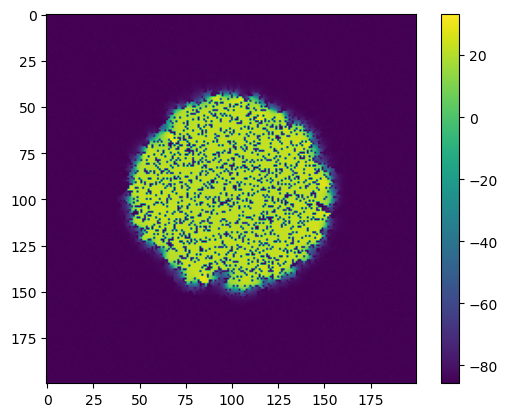

In [ ]:

#
# The basic example of running simple simuations with the Aliev-Panfilov model.
# The model is a 2D model with isotropic stencil.
# The model is stimulated with a voltage pulse in the center of the tissue.
# 

import numpy as np
import matplotlib.pyplot as plt

import finitewave as fw

# create a tissue of size 400x400 with cardiomycytes:
n = 400
tissue = fw.CardiacTissue2D([n, n])
tissue.mesh[np.random.random([n, n]) < 0.2] = 2
# tissue.fibers = np.zeros([n, n, 2])
# tissue.fibers[:, :, 0] = 1

# set up stimulation parameters:
stim_sequence = fw.StimSequence()
stim_sequence.add_stim(fw.StimVoltageCoord2D(0, 20, n//2 - 3, n//2 + 3,
                                             n//2 - 3, n//2 + 3))

# create model object:
model = fw.TP062D()
# set up numerical parameters:
model.dt = 0.001
model.dr = 0.1
model.t_max = 30
# add the tissue and the stim parameters to the model object:
model.cardiac_tissue = tissue
model.stim_sequence = stim_sequence

model.run()

# show the potential map at the end of calculations:

plt.figure()
plt.imshow(model.u)
plt.colorbar()
plt.show()


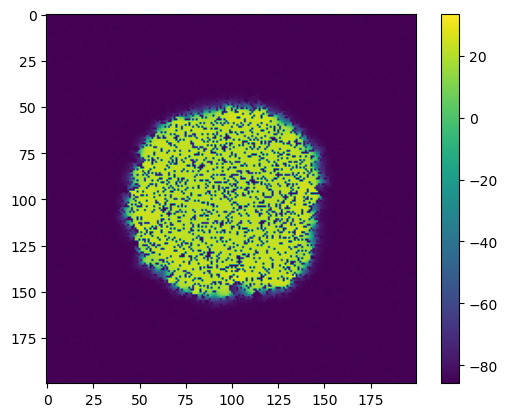

In [7]:
plt.figure()
plt.imshow(aliev_panfilov.u)
plt.colorbar()
plt.show()